In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")


In [3]:
np.random.seed(42)

data = {
    "StudentID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Attendance": np.random.randint(60, 100, 200),
    "Math": np.random.randint(35, 100, 200),
    "Science": np.random.randint(40, 100, 200),
    "English": np.random.randint(45, 100, 200),
}

df = pd.DataFrame(data)

df["Average"] = df[["Math", "Science", "English"]].mean(axis=1)
df["Result"] = np.where(df["Average"] >= 50, "Pass", "Fail")

os.makedirs("../../data/education", exist_ok=True)
df.to_csv("../../data/education/student_performance.csv", index=False)

df.head()


,StudentID,Gender,Attendance,Math,Science,English,Average,Result
0,1,Male,91,43,80,71,64.666667,Pass
1,2,Female,98,77,78,95,83.333333,Pass
2,3,Male,91,82,40,78,66.666667,Pass
3,4,Male,63,73,42,96,70.333333,Pass
4,5,Male,89,76,52,82,70.000000,Pass


In [4]:
df = pd.read_csv("../../data/education/student_performance.csv")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

df.describe()


Dataset Shape: (200, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   200 non-null    int64  
 1   Gender      200 non-null    object 
 2   Attendance  200 non-null    int64  
 3   Math        200 non-null    int64  
 4   Science     200 non-null    int64  
 5   English     200 non-null    int64  
 6   Average     200 non-null    float64
 7   Result      200 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB

Missing Values:
StudentID     0
Gender        0
Attendance    0
Math          0
Science       0
English       0
Average       0
Result        0
dtype: int64


,StudentID,Attendance,Math,Science,English,Average
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,81.105000,67.385000,70.060000,71.960000,69.801667
std,57.879185,11.921602,19.103179,17.838088,16.182017,10.018302
min,1.000000,60.000000,35.000000,40.000000,45.000000,43.666667
25%,50.750000,70.750000,50.000000,54.750000,58.750000,62.666667
50%,100.500000,83.000000,67.000000,70.500000,71.000000,70.000000
75%,150.250000,91.000000,85.000000,86.250000,87.000000,76.750000
max,200.000000,99.000000,99.000000,99.000000,99.000000,95.666667


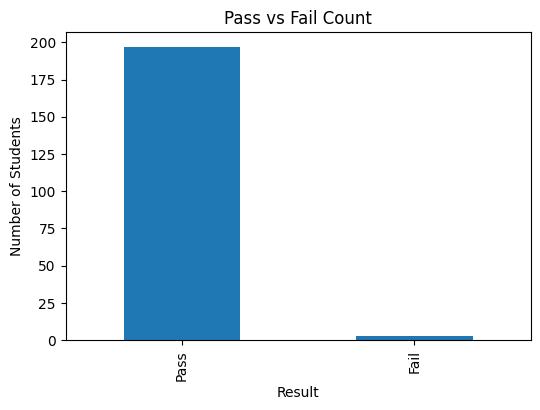

In [5]:
result_counts = df["Result"].value_counts()

plt.figure(figsize=(6,4))
result_counts.plot(kind="bar")
plt.title("Pass vs Fail Count")
plt.xlabel("Result")
plt.ylabel("Number of Students")
plt.show()


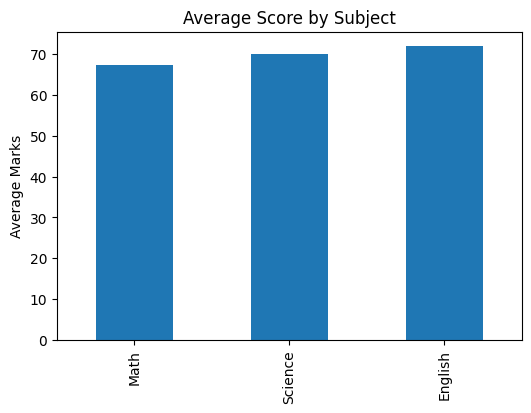

In [6]:
subject_avg = df[["Math", "Science", "English"]].mean()

plt.figure(figsize=(6,4))
subject_avg.plot(kind="bar")
plt.title("Average Score by Subject")
plt.ylabel("Average Marks")
plt.show()


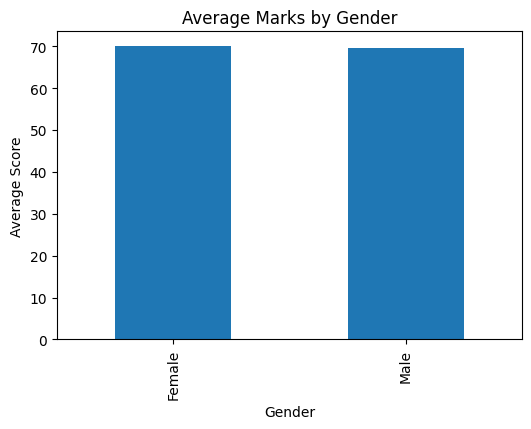

In [7]:
gender_avg = df.groupby("Gender")["Average"].mean()

plt.figure(figsize=(6,4))
gender_avg.plot(kind="bar")
plt.title("Average Marks by Gender")
plt.ylabel("Average Score")
plt.show()


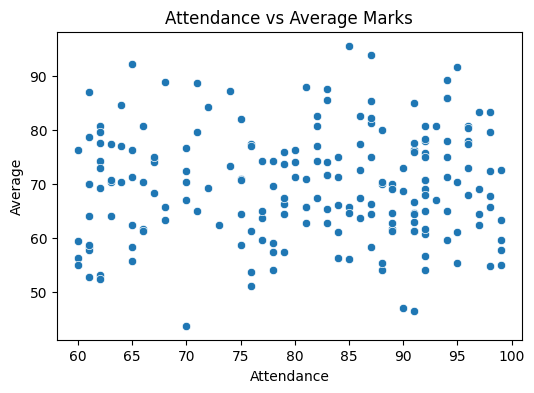

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Attendance", y="Average", data=df)
plt.title("Attendance vs Average Marks")
plt.show()


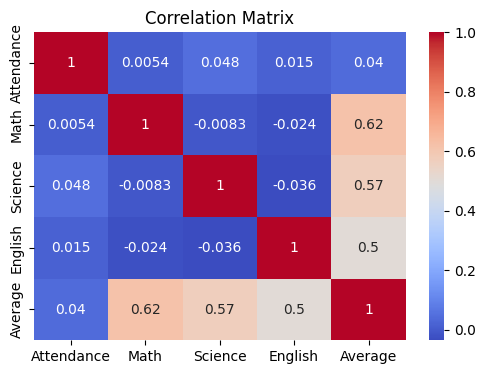

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["Attendance", "Math", "Science", "English", "Average"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


In [11]:
attendance_avg = df.groupby(pd.cut(df["Attendance"], [60,70,80,90,100]))["Average"].mean()
attendance_avg


C:\Users\Mirudhula\AppData\Local\Temp\ipykernel_9184\1860510048.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_avg = df.groupby(pd.cut(df["Attendance"], [60,70,80,90,100]))["Average"].mean()


Attendance
(60, 70]     69.601449
(70, 80]     68.907407
(80, 90]     70.635220
(90, 100]    70.284153
Name: Average, dtype: float64

In [12]:
os.makedirs("../../visualizations/project2_student_analysis", exist_ok=True)
print("Visualization directory ready")


Visualization directory ready


## 📌 Key Insights

1. Students with attendance above 80% consistently score higher averages.
2. Science shows the strongest overall performance among subjects.
3. Attendance and academic performance have a positive correlation.
4. Early academic intervention is required for students below 70% attendance.
5. Gender-wise performance differences are minimal, indicating balanced learning outcomes.

## 🎯 Recommendations

- Introduce attendance monitoring programs.
- Provide remedial classes for low-performing students.
- Encourage data-driven academic planning.
